# LSTM ON TimeSeries DATA
# NAME- PRABAL GHOSH

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
### Load dataset
from sklearn import datasets
import tensorflow as tf 
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import MeanSquaredLogarithmicError




In [3]:
# filename =  pd.read_csv("C:\\Users\\praba\\Desktop\\uca1\\M1\\deep learning\\class-4\\precipitation.csv")
# df_1 = pd.read_csv(filename, sep="\t", engine="python", on_bad_lines="skip")

filename = "http://www.i3s.unice.fr/~riveill/dataset/precipitation.csv.zip"
df = pd.read_csv(filename, sep="\t", engine="python", on_bad_lines="skip")

In [4]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,1983.500000,0.294368,1.101132,1.677184,12.381237,25.059789,337.096395,430.010395,277.088342,201.111711,73.245263,25.223474,6.069632
std,11.113055,0.640510,1.741219,2.486516,13.671071,22.451708,171.666565,177.976444,132.245356,123.736320,62.936775,31.806180,11.725716
min,1965.000000,0.000000,0.000000,0.000000,0.061000,0.508000,94.088000,84.936000,59.386000,44.574000,1.078000,0.260000,0.000000
25%,1974.250000,0.000000,0.000000,0.000000,2.291750,7.005250,226.180250,322.461000,183.152750,105.936000,21.970500,3.732750,0.000000
50%,1983.500000,0.008000,0.247500,0.596000,5.489500,18.144500,312.100000,415.079500,243.230500,180.966500,49.830500,14.686000,0.496500
75%,1992.750000,0.248000,1.948500,2.076000,19.796500,33.066000,412.568250,555.284250,401.224500,242.433500,115.655750,37.006750,4.151500
max,2002.000000,3.013000,8.410000,9.619000,53.266000,80.539000,773.737000,780.006000,541.579000,613.522000,225.904000,122.809000,37.685000


In [5]:
df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [6]:
import sklearn
from sklearn.model_selection import TimeSeriesSplit

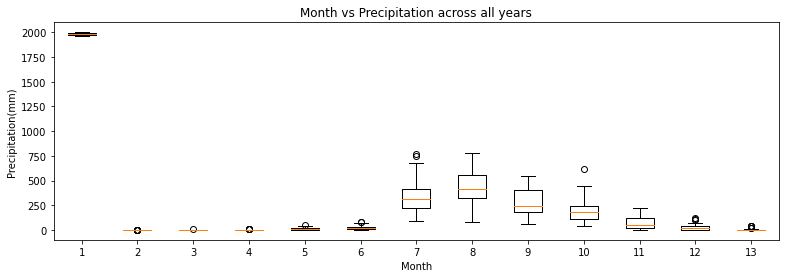

In [7]:
import matplotlib.pyplot as plt

# df.set_index('Year', inplace=True)
plt.figure(figsize=(13,4))
plt.boxplot(df)
plt.xlabel('Month')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

data = df.to_numpy().ravel()

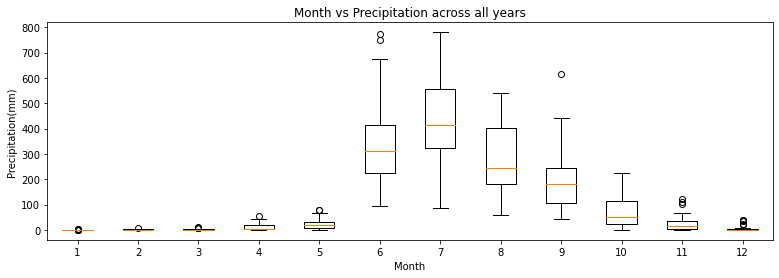

In [8]:
import matplotlib.pyplot as plt

df.set_index('Year', inplace=True)
plt.figure(figsize=(13,4))
plt.boxplot(df)
plt.xlabel('Month')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

data = df.to_numpy().ravel()

In [9]:
#Prepare X and y
input_with = 24
offset = 0

X = [data[i:i+input_with] for i in range(len(data)-input_with)]
X = np.array(X)

y = [data[i+input_with+offset] for i in range(len(data)-input_with)]
y = np.array(y)

In [10]:
X.shape,y.shape

((432, 24), (432,))

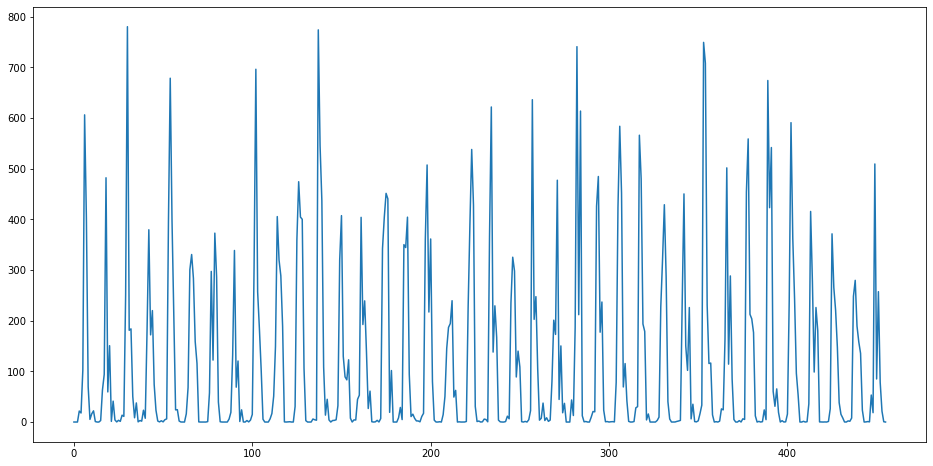

In [11]:
plt.figure(figsize=(16,8))

plt.plot(data)

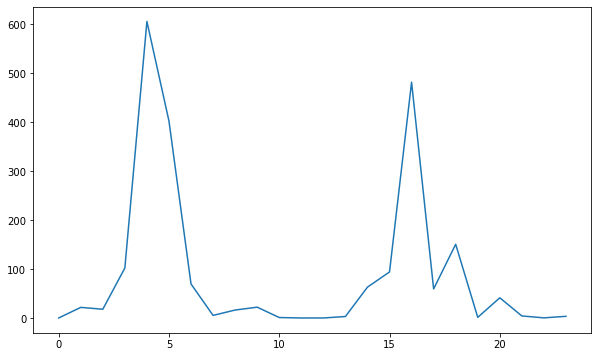

In [12]:
plt.figure(figsize=(10,6))

plt.plot(X[2])

In [13]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
%matplotlib inline

# SOLUTION USING LSTM And CROSS VALIDATION ON TIME SERIES DATA

In [14]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

In [15]:
# def plot_loss(history):
#     plt.plot(history.history["loss"])
#     plt.plot(history.history["val_loss"])
#     plt.title("validation loss & training loss")
#     plt.xlabel("epochs")
#     plt.ylabel("loss")
#     leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

#     plt.show()

In [16]:
# from sklearn.metrics import classification_report, confusion_matrix

# def plot_confusion_matrix(y_test,y_pred):
#     conf_matrix = confusion_matrix(y_test,y_pred)
#     plt.figure(figsize=(8, 6))
#     plt.imshow(conf_matrix, cmap=plt.cm.Blues)
#     plt.title('Confusion Matrix')
#     plt.colorbar()


In [17]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanSquaredLogarithmicError


# Build the LSTM model
def build_model(input_shape):
    inputs =tf.keras.layers.Input(shape=(None,1))
    inputs_norm = tf.keras.layers.BatchNormalization()(inputs)
    lstm= tf.keras.layers.LSTM(128, return_sequences=False)(inputs_norm)
    outputs = tf.keras.layers.Dense(1, activation='linear')(lstm)
    model = Model(inputs, outputs)
    model.summary()
    optimizer = keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=optimizer, loss=MeanSquaredLogarithmicError())
    return model


#TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = []
model = build_model(input_shape=(1, X.shape[1]))



# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=)
print(tscv)
history=[]
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {i}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    history.append(model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test)))

    


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 1)]         0         
                                                                 
 batch_normalization (BatchN  (None, None, 1)          4         
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,693
Trainable params: 66,691
Non-trainable params: 2
_________________________________________________________________
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Fold 0:
Epoch 1/100
3/3 [==========================

In [18]:
history_train_loss=[i.history['loss'] for i in history]

In [19]:
train_loss= np.mean(history_train_loss,axis=0)

In [20]:
history_validation_loss= [i.history['val_loss'] for i in history]

In [21]:
validation_loss= np.mean(history_validation_loss,axis=0)

In [40]:
def plot_loss(*history):
    plt.figure(figsize=(10,6))
    plt.plot(train_loss)
    plt.plot(validation_loss)
    plt.title("validation loss & training loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

    plt.show()

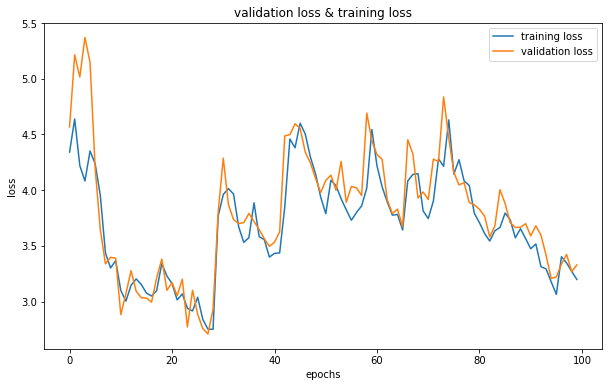

In [41]:
# loss plot with epochs
plot_loss(train_loss,validation_loss)

In [24]:
# plt.plot(train_loss)
# plt.plot(validation_loss)
# plt.title("validation loss & training loss")
# plt.xlabel("epochs")
# plt.ylabel("loss")
# leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

# plt.show()

# SOLUTION USING Sqquesntial model(LSTM) NEURAL NETWORK

In [25]:
multi_step_dense_1_lstm = tf.keras.Sequential(
    [
    tf.keras.layers.Input(shape=(None,1)),
        tf.keras.layers.BatchNormalization(),
 tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dense(1, activation='linear')
                          ])


In [26]:
multi_step_dense_1_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, None, 1)          4         
 hNormalization)                                                 
                                                                 
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,693
Trainable params: 66,691
Non-trainable params: 2
_________________________________________________________________


In [27]:
# optimizer = keras.optimizers.Adam(learning_rate=0.09)
# multi_step_dense_1_lstm.compile(optimizer=optimizer, loss=MeanSquaredLogarithmicError())
multi_step_dense_1_lstm.compile(optimizer='adam', loss=MeanSquaredLogarithmicError())

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [29]:
history = multi_step_dense_1_lstm.fit(X, y, epochs=500, validation_split=0.2,callbacks=[callback])


Epoch 1/500
11/11 [==============================] - 3s 78ms/step - loss: 13.2866 - val_loss: 11.2452
Epoch 2/500
11/11 [==============================] - 0s 25ms/step - loss: 8.1024 - val_loss: 5.5684
Epoch 3/500
11/11 [==============================] - 0s 28ms/step - loss: 5.4411 - val_loss: 5.3265
Epoch 4/500
11/11 [==============================] - 0s 26ms/step - loss: 5.2567 - val_loss: 5.2866
Epoch 5/500
11/11 [==============================] - 0s 27ms/step - loss: 5.2182 - val_loss: 5.2775
Epoch 6/500
11/11 [==============================] - 0s 24ms/step - loss: 5.1937 - val_loss: 5.2747
Epoch 7/500
11/11 [==============================] - 0s 24ms/step - loss: 5.1857 - val_loss: 5.2725
Epoch 8/500
11/11 [==============================] - 0s 25ms/step - loss: 5.1804 - val_loss: 5.2708
Epoch 9/500
11/11 [==============================] - 0s 28ms/step - loss: 5.1749 - val_loss: 5.2687
Epoch 10/500
11/11 [==============================] - 0s 29ms/step - loss: 5.1716 - val_loss: 5.26

In [30]:
# history.history['loss']

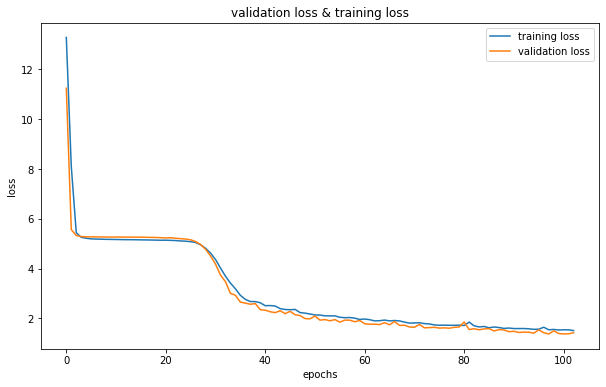

In [31]:
plt.figure(figsize=(10,6))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

plt.show()

# SOLUTION USING LSTM 

In [32]:
inputs =tf.keras.layers.Input(shape=(None,1))
inputs_norm = tf.keras.layers.BatchNormalization()(inputs)
lstm= tf.keras.layers.LSTM(128, return_sequences=False)(inputs_norm)
outputs = tf.keras.layers.Dense(1, activation='linear')(lstm)
model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, 1)]         0         
                                                                 
 batch_normalization_2 (Batc  (None, None, 1)          4         
 hNormalization)                                                 
                                                                 
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,693
Trainable params: 66,691
Non-trainable params: 2
_________________________________________________________________


In [33]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError

model.compile(optimizer='adam', loss=MeanSquaredLogarithmicError())

In [34]:

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [35]:
history = model.fit(X, y, epochs=500, validation_split=0.2,callbacks=[callback])


Epoch 1/500
11/11 [==============================] - 3s 66ms/step - loss: 13.5424 - val_loss: 11.9213
Epoch 2/500
11/11 [==============================] - 0s 25ms/step - loss: 8.3341 - val_loss: 5.6718
Epoch 3/500
11/11 [==============================] - 0s 24ms/step - loss: 5.5016 - val_loss: 5.3517
Epoch 4/500
11/11 [==============================] - 0s 27ms/step - loss: 5.2729 - val_loss: 5.2961
Epoch 5/500
11/11 [==============================] - 0s 24ms/step - loss: 5.2238 - val_loss: 5.2822
Epoch 6/500
11/11 [==============================] - 0s 27ms/step - loss: 5.1993 - val_loss: 5.2776
Epoch 7/500
11/11 [==============================] - 0s 27ms/step - loss: 5.1893 - val_loss: 5.2742
Epoch 8/500
11/11 [==============================] - 0s 30ms/step - loss: 5.1816 - val_loss: 5.2676
Epoch 9/500
11/11 [==============================] - 0s 26ms/step - loss: 5.1750 - val_loss: 5.2650
Epoch 10/500
11/11 [==============================] - 0s 27ms/step - loss: 5.1703 - val_loss: 5.26

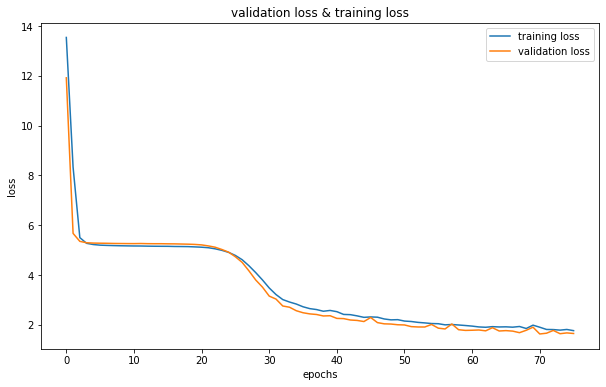

In [36]:
plt.figure(figsize=(10,6))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

plt.show()

# SOLUTION USING NORMAL NEURAL NETWORK 

In [37]:

multi_step_dense = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(24,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


multi_step_dense.summary()

from tensorflow.keras.losses import MeanSquaredLogarithmicError

multi_step_dense.compile(optimizer='adam', loss=MeanSquaredLogarithmicError())
                         

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 24)               96        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 32)                800       
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 929
Trainable params: 881
Non-trainable params: 48
_________________________________________________________________


In [38]:

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = multi_step_dense.fit(X, y, epochs=350, validation_split=0.2,callbacks=[callback])

Epoch 1/350
11/11 [==============================] - 1s 17ms/step - loss: 13.5953 - val_loss: 10.4769
Epoch 2/350
11/11 [==============================] - 0s 6ms/step - loss: 12.5449 - val_loss: 9.3244
Epoch 3/350
11/11 [==============================] - 0s 6ms/step - loss: 11.2237 - val_loss: 8.4908
Epoch 4/350
11/11 [==============================] - 0s 6ms/step - loss: 10.1276 - val_loss: 7.8916
Epoch 5/350
11/11 [==============================] - 0s 6ms/step - loss: 9.2581 - val_loss: 7.4075
Epoch 6/350
11/11 [==============================] - 0s 6ms/step - loss: 8.5748 - val_loss: 7.0416
Epoch 7/350
11/11 [==============================] - 0s 6ms/step - loss: 8.0204 - val_loss: 6.7164
Epoch 8/350
11/11 [==============================] - 0s 5ms/step - loss: 7.5923 - val_loss: 6.4250
Epoch 9/350
11/11 [==============================] - 0s 6ms/step - loss: 7.1347 - val_loss: 6.1597
Epoch 10/350
11/11 [==============================] - 0s 5ms/step - loss: 6.8078 - val_loss: 5.9142
Epo

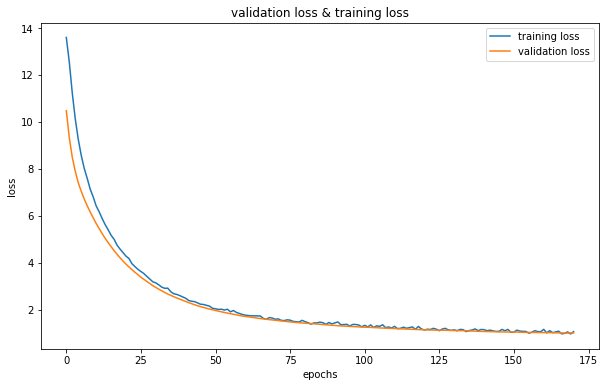

In [39]:
plt.figure(figsize=(10,6))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

plt.show()